 MNIST dataset is a set of images of handwritten digits https://en.wikipedia.org/wiki/MNIST_database.
The dataset has been provided to you in a .csv file.

Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("mnist_dataset.csv", header = 0,index_col=0)
#df = pd.read_csv("sample_data/mnist_test.csv", header = 0,index_col=0)

Quick data inspection

In [ ]:
df.head(2)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.tail(2)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
69998,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69999,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(70000, 785)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 69999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 419.8 MB


In [ ]:
df.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,4.452429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001800,0.006714,0.003086,0.000129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000229,0.001329,0.011329,0.023071,0.043229,0.062243,0.117929,...,3.572529,2.597929,1.659614,0.992457,0.541814,0.245643,0.080957,0.021000,0.000829,0.000843,0.0,0.0,0.0,0.0,0.0,0.0,0.002171,0.013357,0.036000,0.082671,0.122586,0.187657,0.310871,0.394871,0.495457,0.571071,0.669500,0.589571,0.479229,0.333600,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,2.890195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.440064,1.260218,0.816403,0.034017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060474,0.230432,1.322745,2.029539,2.951033,3.242019,4.820413,...,26.274268,22.238669,17.840756,13.744477,10.299782,6.699808,3.631055,1.638692,0.136380,0.222999,0.0,0.0,0.0,0.0,0.0,0.0,0.405072,1.593527,2.409111,3.872385,4.709048,6.022443,7.421689,8.660856,9.605280,10.274678,11.236708,10.501991,9.448936,7.921717,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0

In [ ]:
# To check if we have any values and that no data was lost during its manipulation let's compute
# the sum of the values in each row

sum_rows = df.sum(axis=1)
print(sum_rows)

0        30172
1        18699
2        34914
3        37329
4        20492
         ...  
69995    11658
69996    18831
69997    22482
69998    34048
69999    18279
Length: 70000, dtype: int64


In [ ]:
# Let's load the MNIST data

mnist = df
X = mnist.drop(['label'], axis=1)/ 255.0
y = mnist.label
print(X)
print(y)

       1x1  1x2  1x3  1x4  1x5  1x6  ...  28x23  28x24  28x25  28x26  28x27  28x28
0      0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
1      0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
2      0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
3      0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
4      0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
...    ...  ...  ...  ...  ...  ...  ...    ...    ...    ...    ...    ...    ...
69995  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
69996  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
69997  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
69998  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0
69999  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0

[70

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


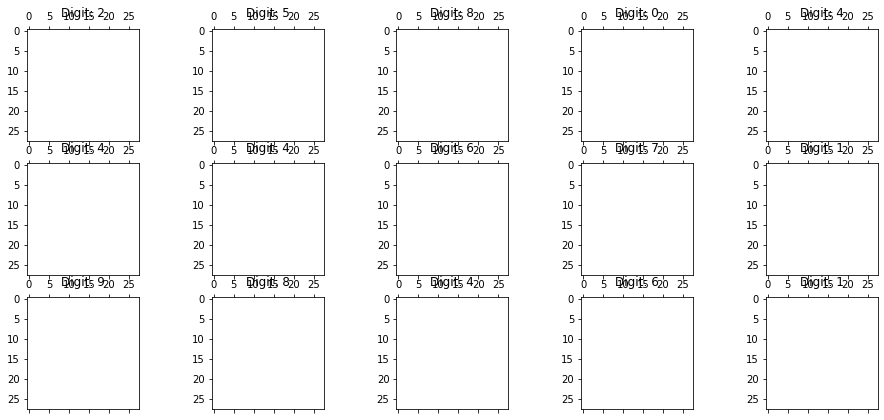

In [ ]:
feat_cols = [ 'pixel' + str(i) for i in range(X.shape[1]) ]

mnist_df = pd.DataFrame(X, columns=feat_cols)
mnist_df['y'] = y

mnist_df['label'] = mnist_df['y'].apply(lambda i: str(i))

X, y = None, None


# Generate 30 plots of randomly selected images

plt.gray()

fig= plt.figure(figsize=(16,7))

for i in range(0, 15):
    ax = fig.add_subplot(3,5, i+1, title="Digit: {}".format(str(mnist_df.loc[i, 'label'])))
    
    ax.matshow(mnist_df.loc[i, feat_cols].values.reshape((28,28)).astype(float))

plt.show()

Split the data set into training and testing.  

In [ ]:
#take the first 60,000 instances for training, and the remaining 10,000 for testing
df_train=df[:60000]
df_test=df[60001:]

In [ ]:
x_train=df_train.drop(['label'], axis=1)
y_train=df_train.label
x_test=df_test.drop(['label'], axis=1)
y_test=df_test.label


Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.

In [ ]:
# YOUR CODE HERE
import sklearn as sk

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)
RandomForestClassifier(...)
y_train_pred=clf.predict(x_train)
print(y_train_pred)

[2 0 8 ... 7 4 7]


In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_test, y_test)
RandomForestClassifier(...)
y_test_pred=clf.predict(x_test)
print(y_test_pred)

[1 4 1 ... 4 2 7]


Evaludation

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
train_errors, test_errors = [], []

In [ ]:
train_errors.append(mean_squared_error(y_train, y_train_pred))
test_errors.append(mean_squared_error(y_test, y_test_pred))

In [ ]:
print(train_errors)

[7.220716666666666]


In [ ]:
print(test_errors)

[7.031803180318032]


Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
X2=df.drop(['label'], axis=1)

In [ ]:
Y2=df.label

In [ ]:
X2.columns

Index(['1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9', '1x10',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=784)

In [ ]:
# build an array of features only.
minst_feature_cols = [item for item in X2.columns]



In [ ]:
from sklearn.decomposition import PCA

pca_100f = PCA(n_components=100)

minst_100d = pca_100f.fit_transform(X2[minst_feature_cols])
pca_100f.components_

array([[ 6.43446635e-18,  9.71917869e-19,  3.26449089e-19, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.89001473e-17,  7.51146539e-18,  4.62252638e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.73721476e-17, -4.92241032e-18,  1.34668256e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [ 2.07282579e-17,  4.47571949e-17, -4.72590116e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.94631024e-17,  5.36591870e-17,  1.07454723e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 8.01149148e-19, -1.47244499e-17, -1.58168702e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [ ]:
pca_100f.explained_variance_ratio_

array([0.09746116, 0.07155445, 0.06149531, 0.05403385, 0.04888934,
       0.04305227, 0.03278262, 0.02889642, 0.02758364, 0.0234214 ,
       0.02106689, 0.02037553, 0.01707064, 0.0169402 , 0.01583382,
       0.01486345, 0.01319358, 0.01279014, 0.01187272, 0.01152937,
       0.0106604 , 0.01009794, 0.00959151, 0.00909635, 0.00883287,
       0.00838818, 0.00809832, 0.00785718, 0.00740262, 0.00690014,
       0.00656144, 0.0064547 , 0.00600819, 0.00585612, 0.00566754,
       0.00543471, 0.00504717, 0.00487079, 0.00478955, 0.00467594,
       0.00454369, 0.00444918, 0.00418216, 0.00396164, 0.00383707,
       0.00375784, 0.00361426, 0.00349024, 0.00338731, 0.00319694,
       0.00316853, 0.00310144, 0.00296477, 0.00287099, 0.0028251 ,
       0.00269419, 0.00268386, 0.00256501, 0.00253161, 0.00244639,
       0.00239689, 0.00238569, 0.00229201, 0.00220901, 0.00213026,
       0.0020628 , 0.00202751, 0.00194841, 0.00191421, 0.0018852 ,
       0.0018688 , 0.00179948, 0.00176736, 0.00173302, 0.00164

In [ ]:
pca_100f_cum_var = np.cumsum(pca_100f.explained_variance_ratio_)
pca_100f_cum_var

array([0.09746116, 0.16901561, 0.23051091, 0.28454476, 0.3334341 ,
       0.37648637, 0.40926898, 0.4381654 , 0.46574904, 0.48917044,
       0.51023733, 0.53061286, 0.5476835 , 0.5646237 , 0.58045752,
       0.59532097, 0.60851456, 0.6213047 , 0.63317742, 0.64470679,
       0.65536719, 0.66546513, 0.67505665, 0.684153  , 0.69298586,
       0.70137405, 0.70947236, 0.71732954, 0.72473217, 0.73163231,
       0.73819375, 0.74464845, 0.75065664, 0.75651276, 0.7621803 ,
       0.767615  , 0.77266217, 0.77753297, 0.78232252, 0.78699845,
       0.79154214, 0.79599132, 0.80017348, 0.80413511, 0.80797218,
       0.81173002, 0.81534428, 0.81883452, 0.82222183, 0.82541877,
       0.8285873 , 0.83168874, 0.83465352, 0.83752451, 0.84034961,
       0.8430438 , 0.84572766, 0.84829267, 0.85082428, 0.85327068,
       0.85566756, 0.85805326, 0.86034526, 0.86255428, 0.86468454,
       0.86674734, 0.86877485, 0.87072326, 0.87263747, 0.87452267,
       0.87639147, 0.87819094, 0.8799583 , 0.88169132, 0.88333

In [ ]:
pca_200f = PCA(n_components=200)

minst_200d = pca_200f.fit_transform(X2[minst_feature_cols])
pca_200f.components_

array([[ 4.65434439e-19, -3.92545109e-19, -1.63509523e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.73780725e-17, -2.90216445e-18,  5.99915584e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.44405984e-17,  1.99276002e-17, -1.18373965e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-2.45328561e-17, -5.02925046e-17, -1.46152667e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.73406352e-17, -3.08589354e-17,  3.51585914e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 8.44253160e-17, -2.56598424e-17,  2.42423871e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [ ]:
pca_200f.explained_variance_ratio_

array([0.09746116, 0.07155445, 0.06149531, 0.05403385, 0.04888934,
       0.04305227, 0.03278262, 0.02889642, 0.02758364, 0.0234214 ,
       0.02106689, 0.02037553, 0.01707064, 0.0169402 , 0.01583382,
       0.01486345, 0.01319358, 0.01279014, 0.01187272, 0.01152937,
       0.0106604 , 0.01009794, 0.00959151, 0.00909635, 0.00883287,
       0.00838818, 0.00809832, 0.00785718, 0.00740262, 0.00690014,
       0.00656144, 0.0064547 , 0.00600819, 0.00585612, 0.00566754,
       0.00543471, 0.00504717, 0.00487079, 0.00478955, 0.00467594,
       0.00454369, 0.00444918, 0.00418217, 0.00396164, 0.00383708,
       0.00375785, 0.00361426, 0.00349025, 0.00338732, 0.00319696,
       0.00316854, 0.00310145, 0.0029648 , 0.00287101, 0.00282514,
       0.00269423, 0.00268392, 0.00256509, 0.00253168, 0.00244648,
       0.00239702, 0.00238581, 0.00229234, 0.00220949, 0.0021306 ,
       0.00206317, 0.00202781, 0.00195035, 0.00191471, 0.0018855 ,
       0.00186976, 0.00180104, 0.00176787, 0.00173359, 0.00164

In [ ]:
pca_200f_cum_var = np.cumsum(pca_200f.explained_variance_ratio_)
pca_200f_cum_var

array([0.09746116, 0.16901561, 0.23051091, 0.28454476, 0.3334341 ,
       0.37648637, 0.40926898, 0.4381654 , 0.46574904, 0.48917044,
       0.51023733, 0.53061286, 0.5476835 , 0.5646237 , 0.58045752,
       0.59532097, 0.60851456, 0.6213047 , 0.63317742, 0.64470679,
       0.65536719, 0.66546513, 0.67505665, 0.684153  , 0.69298586,
       0.70137405, 0.70947236, 0.71732954, 0.72473217, 0.73163231,
       0.73819375, 0.74464845, 0.75065664, 0.75651276, 0.7621803 ,
       0.767615  , 0.77266217, 0.77753297, 0.78232252, 0.78699846,
       0.79154214, 0.79599132, 0.80017349, 0.80413513, 0.8079722 ,
       0.81173005, 0.81534432, 0.81883456, 0.82222188, 0.82541884,
       0.82858738, 0.83168883, 0.83465363, 0.83752465, 0.84034978,
       0.84304401, 0.84572793, 0.84829303, 0.85082471, 0.85327119,
       0.85566821, 0.85805402, 0.86034636, 0.86255585, 0.86468645,
       0.86674963, 0.86877744, 0.87072779, 0.8726425 , 0.87452799,
       0.87639775, 0.8781988 , 0.87996667, 0.88170025, 0.88334

With only 200 dimension, it will acheive 96.6% variance

Compare PCA to the original dataset

In [ ]:
minst_200d_df=pd.DataFrame(minst_200d)

In [ ]:
minst_200d_df

(70000, 200)

In [ ]:
minst_200d_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,-259.111055,-826.332809,-686.054262,174.540264,463.405868,686.094176,323.164597,-160.418113,-157.261270,-110.750980,39.812981,-244.591916,-203.128862,-287.243383,-100.406947,289.441852,-183.241324,-188.558918,225.420397,-97.001510,417.428903,-365.040615,-25.795920,-96.457950,280.568119,81.737389,129.019191,444.608760,-32.053761,107.357704,107.692303,99.768212,119.492946,-200.736494,-53.628635,23.567202,-318.062739,85.004164,96.105164,-16.797913,...,-52.662516,43.539739,69.521085,-34.612815,-9.248086,27.256235,37.493993,0.730779,24.247656,-29.127411,8.681803,-42.803887,40.377747,63.841020,68.851284,9.563336,-15.204471,9.428155,-15.189043,49.354527,23.564951,20.113938,11.338104,-32.198818,-1.233038,24.179360,14.164331,-25.140743,5.013907,-65.842594,-4.440358,-8.159900,4.812371,6.156224,41.881330,0.19746,56.806059,-25.241619,-17.519527,-26.773977
1,-14.566188,-183.359970,-608.139998,508.390033,-700.094549,13.271489,-115.504735,95.130037,75.423576,-552.017544,-54.286578,178.633270,176.021048,-185.346501,-174.509493,69.953796,232.921235,-307.392726,40.965118,370.085358,272.184961,-89.652048,-92.135146,42.045659,102.720060,-197.788857,-86.674736,155.590804,-49.076087,22.023910,-192.064269,135.261012,-61.803771,31.219025,-83.379637,-264.447643,69.019815,-103.196127,-98.713251,243.263898,...,91.296992,36.488425,9.250120,-27.263417,-0.666618,-22.096469,25.450759,-20.176569,24.902050,-39.137885,-39.463107,99.117929,-2.400636,10.634848,9.762408,13.798261,36.523951,15.685801,12.300127,34.739401,40.410231,-108.062536,-18.547378,23.345560,2.581085,-0.699264,-6.372021,41.517502,-20.964477,-57.885276,44.879506,1.114293,44.816415,2.476559,-8.980701,-40.50403,13.042738,11.633125,44.131341,40.322563


In [ ]:
clf.fit(minst_200d_df, Y2)
y_200d=clf.predict(minst_200d)
print(y_200d)

[1 0 8 ... 4 8 7]


In [ ]:
reduced_errors= []
reduced_errors.append(mean_squared_error(Y2, y_200d))
print(reduced_errors)

[5.089828571428572]


In [ ]:
print(test_errors)

[7.031803180318032]


The PCA reduced dimension dataset has a MSE of 5.09, which is lower than the original data set which has a MSE of 7.03. The performance of reduced dataset model is better. 

Use t-SNE to reduce the MNIST dataset, show result graphically.

In [ ]:
import time

In [ ]:
N=10000
mnist_df_subset = df.loc[:N, :].copy()
time_start = time.time()
# import TSNE from sklearn
from sklearn.manifold import TSNE




In [ ]:
x_minst_subeset=mnist_df_subset.drop(['label'], axis=1)

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)


In [ ]:
tsne_result = tsne.fit_transform(x_minst_subeset.values)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10001 samples in 1.127s...
[t-SNE] Computed neighbors for 10001 samples in 178.536s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10001
[t-SNE] Computed conditional probabilities for sample 2000 / 10001
[t-SNE] Computed conditional probabilities for sample 3000 / 10001
[t-SNE] Computed conditional probabilities for sample 4000 / 10001
[t-SNE] Computed conditional probabilities for sample 5000 / 10001
[t-SNE] Computed conditional probabilities for sample 6000 / 10001
[t-SNE] Computed conditional probabilities for sample 7000 / 10001
[t-SNE] Computed conditional probabilities for sample 8000 / 10001
[t-SNE] Computed conditional probabilities for sample 9000 / 10001
[t-SNE] Computed conditional probabilities for sample 10000 / 10001
[t-SNE] Computed conditional probabilities for sample 10001 / 10001
[t-SNE] Mean sigma: 435.853079
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.192757
[t-SNE

In [ ]:
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 217.30750131607056 seconds


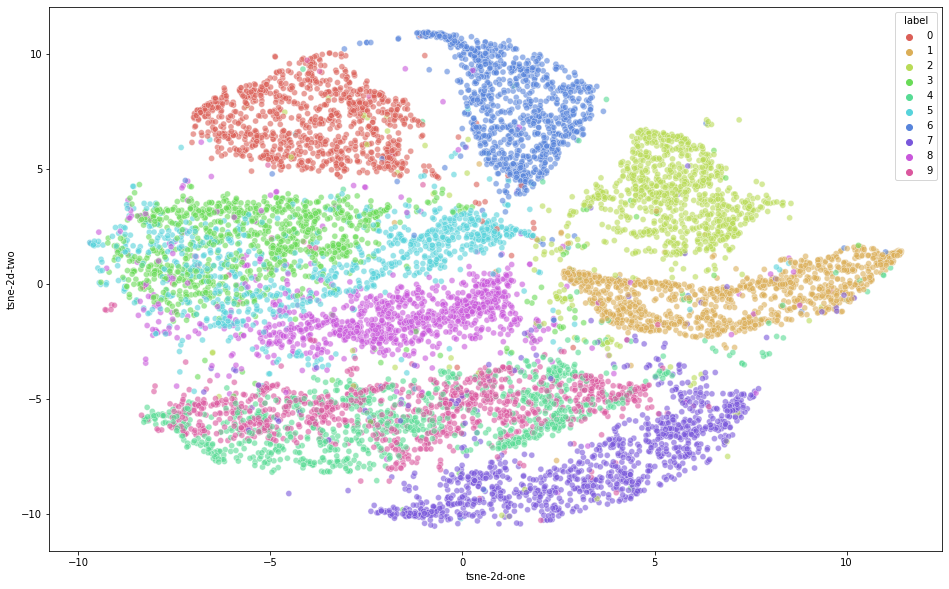

In [ ]:
mnist_df_subset['tsne-2d-one'] = tsne_result[:, 0]
mnist_df_subset['tsne-2d-two'] = tsne_result[:, 1]

plt.figure(figsize=(16,10))
sns.scatterplot(x='tsne-2d-one', y='tsne-2d-two', hue='label',
               palette=sns.color_palette('hls', 10),
               data=mnist_df_subset,
               alpha=0.6)

Compare with other dimensionality methods: _Locally Linear Embedding_ (LLE) or _Multidimensional scaling_ (MDS).

Locally Linear Embedding (LLE)

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding


In [ ]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=41)
X_reduced_sr = lle.fit_transform(x_test)

In [ ]:
#lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=41)
#X_reduced_sr = lle.fit_transform(X2)

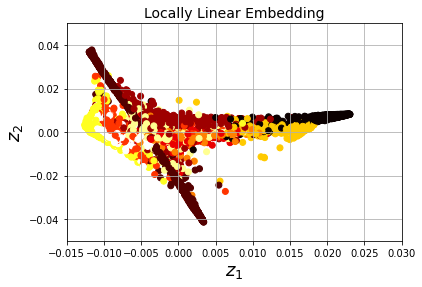

In [ ]:
plt.title("Locally Linear Embedding", fontsize=14)
plt.scatter(X_reduced_sr[:, 0], X_reduced_sr[:, 1],c=y_test,cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.015, 0.03, -0.05, 0.05])
plt.grid(True)

plt.show()

Multidimensional scaling (MDS)

In [ ]:
from sklearn.manifold import MDS
X2.shape

(70000, 784)

In [ ]:
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(x_test[:1000])
X_transformed.shape

(1000, 2)

In [ ]:
print(X_transformed)

[[1589.99697383 1372.6695438 ]
 [-882.20016283 1616.09146719]
 [ 171.1190318  2211.54210306]
 ...
 [ 250.86571108 1880.32628184]
 [ 819.21475568 2038.76898408]
 [-806.73083105 1872.82718818]]


In [ ]:
#embedding = MDS(n_components=2)
#X_transformed = embedding.fit_transform(x_test[:200])
#X_transformed.shape
#(200, 2)

In [ ]:
t=y_test[:1000]

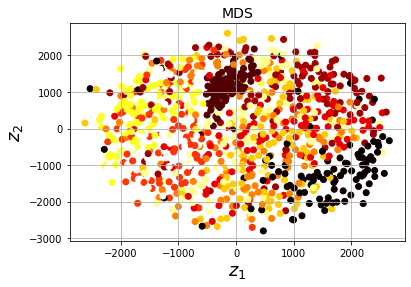

In [ ]:
plt.title("MDS", fontsize=14)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1],c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.grid(True)

plt.show()